## What is the Shapley Value? <br>
Let me explain the Shapley value with a story: Assume Ann, Bob, and Cindy together were hammering an “error” wood log, 38 inches, to the ground. After work, they went to a local bar for a drink and I, a mathematician, came to join them. I asked a very bizarre question: “What is everyone’s contribution (in inches)?”



## From the Shaley Value to SHAP (SHapley Additive exPlanations) <br>
The SHAP (SHapley Additive exPlanations) deserves its own space rather than an extension of the Shapley value. Inspired by several methods (1,2,3,4,5,6,7) on model interpretability, Lundberg and Lee (2016) proposed the SHAP value as a united approach to explaining the output of any machine learning model. Three benefits worth mentioning here.
The first one is global interpretability — the collective SHAP values can show how much each predictor contributes, either positively or negatively, to the target variable. This is like the variable importance plot but it is able to show the positive or negative relationship for each variable with the target (see the SHAP value plot below).
<br>The second benefit is local interpretability — each observation gets its own set of SHAP values (see the individual SHAP value plot below). This greatly increases its transparency. We can explain why a case receives its prediction and the contributions of the predictors. Traditional variable importance algorithms only show the results across the entire population but not on each individual case. The local interpretability enables us to pinpoint and contrast the impacts of the factors.
<br>Third, the SHAP values can be calculated for any tree-based model, while other methods use linear regression or logistic regression models as the surrogate models. <br>
The SHAP value works for either the case of continuous or binary target variable. The binary case is achieved in the notebook

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Prepare RandomForestRegressor Model

In [41]:
df = pd.read_csv('winequality-red.csv')

# The target variable is 'quality'.
Y = df['quality']

# Independent variable 
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]

# Split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Train model using RandomForestRegressor
model = RandomForestRegressor(max_depth=6,random_state=0,n_estimators=10)
model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## A. Variable importance plot - Global Interpretability
A variable importance plot lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

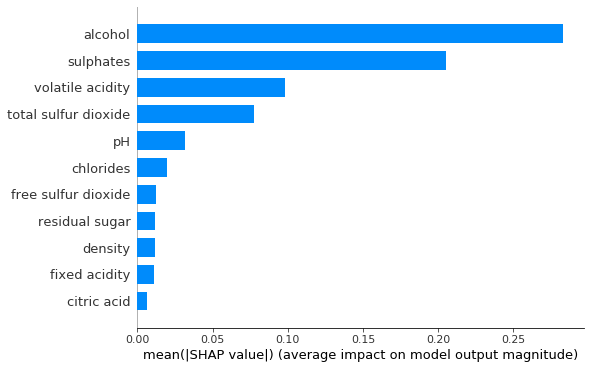

In [42]:
import shap
import matplotlib.pyplot as plt

shap_values = shap.TreeExplainer(model).shap_values(X_train)
f = plt.figure()
shap.summary_plot(shap_values, X_train, plot_type='bar')
f.savefig('plot1.png', bbox_inches='tight', dpi=600)

The SHAP value plot can further show the positive and negative relationships of the predictors with the target variable

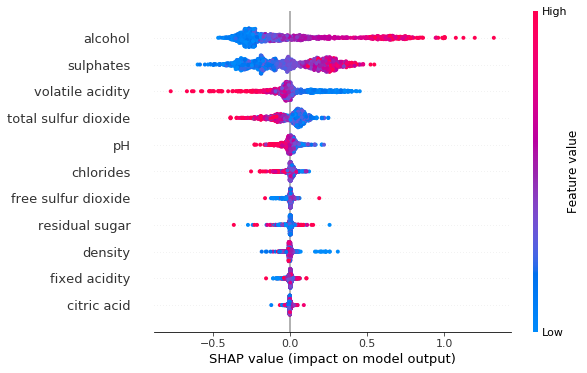

In [43]:
shap.summary_plot(shap_values, X_train)

This plot is made of all the dots in the train data. It demonstrates the following information:<br><br>
Feature importance: Variables are ranked in descending order.<br><br>
Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction. <br><br>
Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.<br><br>
Correlation: A high level of the “alcohol” content has a high and positive impact on the quality rating. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say the “volatile acidity” is negatively correlated with the target variable.

## B. Shap Dependence plot - Global Interpretability 
You may ask how to show a partial dependence plot. The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model (J. H. Friedman 2001). It tells whether the relationship between the target and a feature is linear, monotonic or more complex. In order to create a dependence plot, you only need one line of code: shap.dependence_plot(“alcohol”, shap_values, X_train). The function automatically includes another variable that your chosen variable interacts most with. The following plot shows there is an approximately linear and positive trend between “alcohol” and the target variable, and “alcohol” interacts with “sulphates” frequently.

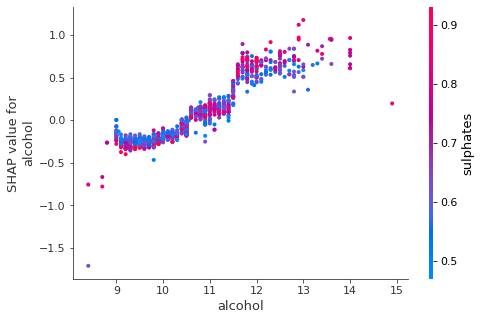

In [21]:
shap.dependence_plot('alcohol',shap_values, X_train)

Suppose you want to know “volatile acidity” and the variable that it interacts the most, you can do shap.dependence_plot(“volatile acidity”, shap_values, X_train). The plot below shows there exists an approximately linear but negative relationship between “volatile acidity” and the target variable. This negative relationship is already demonstrated in the variable importance plot Exhibit (K).

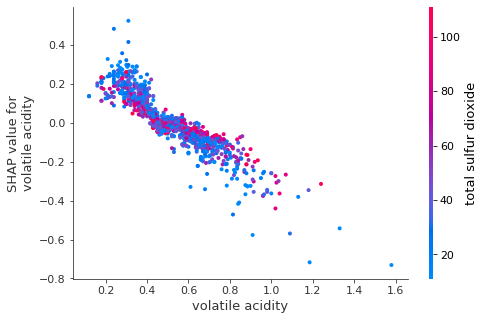

In [22]:
shap.dependence_plot('volatile acidity', shap_values, X_train)

## Individual SHAP value plot - Local interpretability
In order to show you how the SHAP values can be done on individual cases, I will execute on several observations. I randomly chose a few observations in as shown in Table B below:

In [53]:
import numpy as np
np.random.seed(0)
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predict
1032,8.1,0.820,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,4.50
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5.35
1508,7.1,0.270,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,6.26
1479,8.2,0.280,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5.93
866,6.8,0.490,0.22,2.3,0.071,13.0,24.0,0.99438,3.41,0.83,11.3,6.33
1519,6.6,0.700,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,5.47
1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,4.51


In [58]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [59]:
shap_plot(4)

The output value is the prediction for that observation <br>
The base value: The original paper explains that the base value E(y_hat) is “the value that would be predicted if we did not know any features for the current output.” In other words, it is the mean prediction, or mean(yhat). You may wonder why it is 5.62. This is because the mean prediction of Y_test is 5.62. You can test it out by Y_test.mean() which produces 5.62.<br>
Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue. <br>
Alcohol: has a positive impact on the quality rating. The alcohol content of this wine is 11.8 (as shown in the first row of Table B) which is higher than the average value 10.41. So it pushes the prediction to the right. <br>
pH: has a negative impact on the quality rating. A lower than the average pH (=3.26 < 3.30) drives the prediction to the right.<br>
Sulphates: is positively related to the quality rating. A lower than the average Sulphates (= 0.64 < 0.65) pushes the prediction to the left.<br>

### Reference:
https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d